In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as analyzer
import nltk as nt
import numpy as np
import pandas as pd
import os
import praw
import datetime
import matplotlib.pyplot as plt

vader_sentiment = analyzer()

def vader_sentiment_scores(text):
    score = vader_sentiment.polarity_scores(text)
    return score['compound']

text = "he's the best"
tokens = nt.word_tokenize(text)
print(tokens)
print(vader_sentiment_scores(text))

['he', "'s", 'the', 'best']
0.6369


In [88]:
reddit = praw.Reddit(
    client_id = #redacted
    client_secret = #redacted
    user_agent = #redacted
)

In [89]:
submission_ids = [# insert Reddit processed submission IDs]
utctime = []
totscores = []
processed = []

In [96]:
for post in submission_ids:
    submission = reddit.submission(post)
    utctime.append(datetime.datetime.fromtimestamp(submission.created))
    submission.comments.replace_more(limit=None, threshold=5)
    comments = submission.comments.list()

    # Initializing a dictionary to keep tally of results
    result = {'pos': 0, 'neg': 0, 'neu': 0}

    anal = analyzer()

    for comment in comments:
        score = anal.polarity_scores(comment.body)
        if score['compound'] > 0.05:
            result['pos'] += 1
        elif score['compound'] < -0.05:
            result['neg'] += 1
        else:
            result['neu'] += 1

    ovrscore = (int(result['pos'])*1 + int(result['neg'])*-1 + int(result['neu']))/len(comments)

    totscores.append(ovrscore)
    processed.append(post)
    submission_ids.pop(0)

    print("Reddit Post with ID:",post,"has an overall polarity score of",ovrscore)

Reddit Post with ID: snhh47 has an overall polarity score of 0.34285714285714286


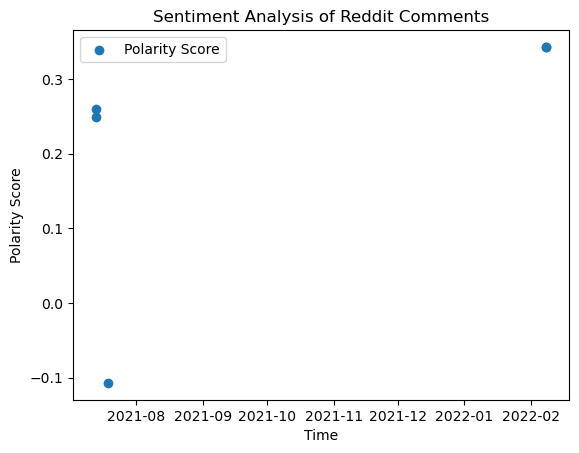

In [99]:
fig, ax = plt.subplots()

# Plot polarity scores over time
ax.scatter(utctime, totscores)

# Customize the plot
ax.set_xlabel('Time')
ax.set_ylabel('Polarity Score')
ax.set_title('Sentiment Analysis of Reddit Comments')
ax.legend(['Polarity Score'])

# Show the plot
plt.show()

In [16]:
thetext = "Unfortunately for all ethnicities, this is a real problem in the UK or not just black people but all BAME. The fact that phrases like BAME even exist shows how unprepared the UK is to accept us as equal. We need a subcategory. As a Pacific Islander, I face racism/ignorance/discrimination on a weekly basis."
vader_sentiment_scores(thetext)

0.6249